In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# html_df = pd.read_html('https://github.com/HamoyeHQ/HDSC-Introduction-to-Python-for-machine-learning')
# html_df.to_html('sample_file.html')

# https://github.com/HamoyeHQ/HDSC-Introduction-to-Python-for-machine-learning

In [3]:
df = pd.read_csv('FoodBalanceSheets_E_Africa_NOFLAG.csv', encoding='latin-1')

In [4]:
df.head()

,Area Code,Area,Item Code,Item,Element Code,Element,Unit,Y2014,Y2015,Y2016,Y2017,Y2018
0,4,Algeria,2501,Population,511,Total Population - Both sexes,1000 persons,38924.00,39728.00,40551.00,41389.00,42228.00
1,4,Algeria,2501,Population,5301,Domestic supply quantity,1000 tonnes,0.00,0.00,0.00,0.00,0.00
2,4,Algeria,2901,Grand Total,664,Food supply (kcal/capita/day),kcal/capita/day,3377.00,3379.00,3372.00,3341.00,3322.00
3,4,Algeria,2901,Grand Total,674,Protein supply quantity (g/capita/day),g/capita/day,94.90,94.35,94.72,92.82,91.83
4,4,Algeria,2901,Grand Total,684,Fat supply quantity (g/capita/day),g/capita/day,80.06,79.36,77.40,80.19,77.28


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60943 entries, 0 to 60942
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Area Code     60943 non-null  int64  
 1   Area          60943 non-null  object 
 2   Item Code     60943 non-null  int64  
 3   Item          60943 non-null  object 
 4   Element Code  60943 non-null  int64  
 5   Element       60943 non-null  object 
 6   Unit          60943 non-null  object 
 7   Y2014         59354 non-null  float64
 8   Y2015         59395 non-null  float64
 9   Y2016         59408 non-null  float64
 10  Y2017         59437 non-null  float64
 11  Y2018         59507 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 5.6+ MB


In [6]:
df.shape

(60943, 12)

In [7]:
df.isnull().sum()

Area Code          0
Area               0
Item Code          0
Item               0
Element Code       0
Element            0
Unit               0
Y2014           1589
Y2015           1548
Y2016           1535
Y2017           1506
Y2018           1436
dtype: int64

In [8]:
df.shape

(60943, 12)

In [9]:
# df[df['Item']== Animal fats].unique()

What is the total sum of Animal Fat produced in 2014 and 2017 respectively?

In [10]:
# df.groupby('Item')['Y2014'].max()
df.groupby('Item')['Y2014'].sum()

Item
Alcohol, Non-Food        2403.00
Alcoholic Beverages    102410.11
Animal Products         11935.65
Animal fats            209460.54
Apples and products      9499.23
                         ...    
Vegetables, Other      155038.96
Vegetal Products       107145.19
Wheat and products     232670.13
Wine                     4497.36
Yams                   200396.96
Name: Y2014, Length: 119, dtype: float64

In [11]:
df.groupby('Item')['Y2017'].sum()

Item
Alcohol, Non-Food        2348.00
Alcoholic Beverages     95581.06
Animal Products         11547.65
Animal fats            269617.53
Apples and products     10198.90
                         ...    
Vegetables, Other      157752.59
Vegetal Products       107655.20
Wheat and products     240047.62
Wine                     4178.02
Yams                   229174.59
Name: Y2017, Length: 119, dtype: float64

2014 = 209460.54 and 2017 = 269617.53


In [12]:
df.describe()

,Area Code,Item Code,Element Code,Y2014,Y2015,Y2016,Y2017,Y2018
count,60943.000000,60943.000000,60943.000000,59354.000000,59395.000000,59408.000000,59437.000000,59507.000000
mean,134.265576,2687.176706,3814.856456,134.196282,135.235966,136.555222,140.917765,143.758381
std,72.605709,146.055739,2212.007033,1567.663696,1603.403984,1640.007194,1671.862359,1710.782658
min,4.000000,2501.000000,511.000000,-1796.000000,-3161.000000,-3225.000000,-1582.000000,-3396.000000
25%,74.000000,2562.000000,684.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,136.000000,2630.000000,5142.000000,0.090000,0.080000,0.080000,0.100000,0.070000
75%,195.000000,2775.000000,5511.000000,8.340000,8.460000,8.430000,9.000000,9.000000
max,276.000000,2961.000000,5911.000000,176405.000000,181137.000000,185960.000000,190873.000000,195875.000000


What is the mean and standard deviation across the whole dataset for the year 2015 to 3 decimal places?

In [13]:
mean_ = df['Y2015'].mean()

In [15]:
round(mean_, 3)

135.236

the mean = 135.196 and 
standard deviation = 1603.404

#### No of null and Percentage of null in 2016

In [16]:
nul = df['Y2016'].isnull().sum()

In [17]:
nul 

1535

In [18]:
total_len= len(df['Y2016'])

In [19]:
total_len

60943

In [20]:
percentage = (nul/total_len)*100

In [21]:
percentage

2.5187470259094566

In [24]:
round(percentage, 2)

2.52

### Year highest correlation with Element code

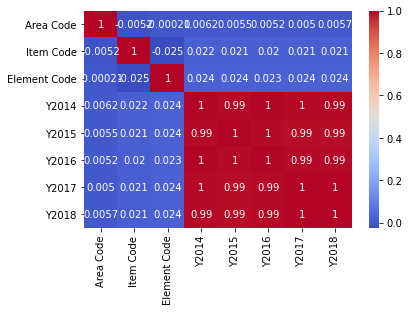

In [22]:
sns.heatmap(df.corr(), cmap='coolwarm', annot= True)

In [23]:
corr = df.corr()
display(corr)

,Area Code,Item Code,Element Code,Y2014,Y2015,Y2016,Y2017,Y2018
Area Code,1.000000,-0.005159,-0.000209,0.006164,0.005472,0.005247,0.005006,0.005665
Item Code,-0.005159,1.000000,-0.024683,0.021722,0.020857,0.020109,0.021494,0.021314
Element Code,-0.000209,-0.024683,1.000000,0.024457,0.023889,0.023444,0.024254,0.024279
Y2014,0.006164,0.021722,0.024457,1.000000,0.994647,0.996081,0.995230,0.994872
Y2015,0.005472,0.020857,0.023889,0.994647,1.000000,0.995739,0.988048,0.988208
Y2016,0.005247,0.020109,0.023444,0.996081,0.995739,1.000000,0.992785,0.992757
Y2017,0.005006,0.021494,0.024254,0.995230,0.988048,0.992785,1.000000,0.998103
Y2018,0.005665,0.021314,0.024279,0.994872,0.988208,0.992757,0.998103,1.000000


### Year 2014 is the highest Correlation eith ELement Code having a value of 0.024457

What year has the highest sum of Import Quantity?

In [44]:
df.groupby('Element')['Y2014','Y2015','Y2016','Y2017','Y2018'].sum()

<ipython-input-44-f801cfa6282d>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby('Element')['Y2014','Y2015','Y2016','Y2017','Y2018'].sum()


,Y2014,Y2015,Y2016,Y2017,Y2018
Element,,,,,
Domestic supply quantity,1996716.35,2021493.55,2044842.70,2088198.10,2161192.10
Export Quantity,150020.64,157614.47,151920.46,182338.80,181594.80
Fat supply quantity (g/capita/day),10225.56,10235.74,10102.77,10253.84,10258.69
Feed,216927.89,225050.22,228958.65,223705.68,233489.68
Food,1212332.49,1232361.10,1247022.17,1258888.28,1303841.28
Food supply (kcal/capita/day),454257.00,453383.00,451810.00,454681.00,455261.00
Food supply quantity (kg/capita/yr),49650.63,49345.13,48985.28,48690.04,49056.85
Import Quantity,274144.48,267018.46,286582.78,294559.09,287997.09
Losses,153223.00,155439.00,157787.00,160614.00,163902.00


TypeError: sort_values() missing 1 required positional argument: 'by'

2017 has the highest sum of 294559.09 of Import Quantity

What is the total number of the sum of Production in 2014

In [31]:
df.groupby('Element')['Y2014'].sum()

Element
Domestic supply quantity                  1996716.35
Export Quantity                            150020.64
Fat supply quantity (g/capita/day)          10225.56
Feed                                       216927.89
Food                                      1212332.49
Food supply (kcal/capita/day)              454257.00
Food supply quantity (kg/capita/yr)         49650.63
Import Quantity                            274144.48
Losses                                     153223.00
Other uses (non-food)                       78718.13
Processing                                 282923.00
Production                                1931287.75
Protein supply quantity (g/capita/day)      11836.46
Residuals                                   30149.00
Seed                                        21922.92
Stock Variation                             58749.83
Total Population - Both sexes             1031585.00
Tourist consumption                           416.00
Name: Y2014, dtype: float64

### Sum of the Production is 1931287. in 2014

In [35]:
# df.groupby('Element')['Y2014'].sum()

Which of these elements had the highest sum in 2018?

In [40]:
highest_sum = df.groupby('Element')['Y2018'].sum()

In [41]:
highest_sum.sort_values(ascending = False)

Element
Domestic supply quantity                  2161192.10
Production                                2075072.89
Food                                      1303841.28
Total Population - Both sexes             1140605.00
Food supply (kcal/capita/day)              455261.00
Processing                                 308429.00
Import Quantity                            287997.09
Feed                                       233489.68
Export Quantity                            181594.80
Losses                                     163902.00
Other uses (non-food)                       91300.97
Food supply quantity (kg/capita/yr)         49056.85
Residuals                                   34864.00
Seed                                        25263.14
Stock Variation                             20577.91
Protein supply quantity (g/capita/day)      11833.56
Fat supply quantity (g/capita/day)          10258.69
Tourist consumption                            90.00
Name: Y2018, dtype: float64

### Domestic supply quantity has the highest sum in 2018 with a value of 2161192.10

Which of these elements had the 3rd lowest sum in 2018?

In [38]:
third_lowest = df.groupby('Element')['Y2018'].sum()

In [39]:
third_lowest.sort_values(ascending = False)

Element
Domestic supply quantity                  2161192.10
Production                                2075072.89
Food                                      1303841.28
Total Population - Both sexes             1140605.00
Food supply (kcal/capita/day)              455261.00
Processing                                 308429.00
Import Quantity                            287997.09
Feed                                       233489.68
Export Quantity                            181594.80
Losses                                     163902.00
Other uses (non-food)                       91300.97
Food supply quantity (kg/capita/yr)         49056.85
Residuals                                   34864.00
Seed                                        25263.14
Stock Variation                             20577.91
Protein supply quantity (g/capita/day)      11833.56
Fat supply quantity (g/capita/day)          10258.69
Tourist consumption                            90.00
Name: Y2018, dtype: float64

Protein supply quantity (g/capita/day)  has the 3rd lowest sum in 2018 with a value of  11833.56

What is the total Import Quantity in Algeria in 2018?

In [52]:
# df.groupby('Area')['Element','Y2018'].sum()
df.groupby(['Area', 'Element'])['Y2018'].sum().head(10)

Area     Element                            
Algeria  Domestic supply quantity               90023.42
         Export Quantity                          811.54
         Fat supply quantity (g/capita/day)       309.09
         Feed                                   10668.00
         Food                                   63736.33
         Food supply (kcal/capita/day)          13288.00
         Food supply quantity (kg/capita/yr)     1509.28
         Import Quantity                        36238.29
         Losses                                  7708.00
         Other uses (non-food)                   3970.08
Name: Y2018, dtype: float64

The total  Import Quantity in Algeria in 2018 is 36238.29

What is the total number of unique countries in the dataset?

In [45]:
len(df['Area'].value_counts())

49

### The total number of unique countries in the dataset is 49